<a href="https://colab.research.google.com/github/AbinSibi466/DS_EX2/blob/main/Abin_Sibi_202_CIA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**II. Implement the following:**
(Implementation 5 marks and Visualization and documentation 5 marks)

• Scenario:
The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.
This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.

• Lab Task: Attempt to implement a Single Layer Perceptron in Google Colab to classify the
output of an XOR gate.
Perform the following steps:
• Create the XOR gate's truth table dataset.


In [22]:
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

weights = np.random.rand(2)
bias = np.random.rand(1)

learning_rate = 0.1




In [23]:
def activation_function(x):
  return 1 if x >= 0 else 0

for epoch in range(100):
  for i in range(len(X)):
    weighted_sum = np.dot(X[i], weights) + bias

    output = activation_function(weighted_sum)

    error = y[i] - output

    weights += learning_rate * error * X[i]
    bias += learning_rate * error

In [24]:
for i in range(len(X)):
  weighted_sum = np.dot(X[i], weights) + bias
  output = activation_function(weighted_sum)
  print(f"Input: {X[i]}, Output: {output}, Expected: {y[i]}")

Input: [0 0], Output: 1, Expected: 0
Input: [0 1], Output: 1, Expected: 1
Input: [1 0], Output: 0, Expected: 1
Input: [1 1], Output: 0, Expected: 0


• Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch
Pitts) Neuron.


In [25]:
import numpy as np

X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])


In [26]:
weights = np.random.rand(2)
bias = np.random.rand(1)

learning_rate = 0.1

def activation_function(x):
  return 1 if x >= 0 else 0

for epoch in range(100):
  for i in range(len(X_xor)):
    weighted_sum = np.dot(X_xor[i], weights) + bias

    output = activation_function(weighted_sum)

    error = y_xor[i] - output

    weights += learning_rate * error * X_xor[i]
    bias += learning_rate * error

def activation_function(x):
  return 1 if x >= 0 else 0

for epoch in range(100):
  for i in range(len(X)):
    weighted_sum = np.dot(X[i], weights) + bias

    output = activation_function(weighted_sum)

    error = y[i] - output

    weights += learning_rate * error * X[i]
    bias += learning_rate * error



In [27]:
for i in range(len(X_xor)):
  weighted_sum = np.dot(X_xor[i], weights) + bias
  output = activation_function(weighted_sum)
  print(f"Input: {X_xor[i]}, Output: {output}, Expected: {y_xor[i]}")

Input: [0 0], Output: 1, Expected: 0
Input: [0 1], Output: 0, Expected: 1
Input: [1 0], Output: 0, Expected: 1
Input: [1 1], Output: 0, Expected: 0


**Visualization**

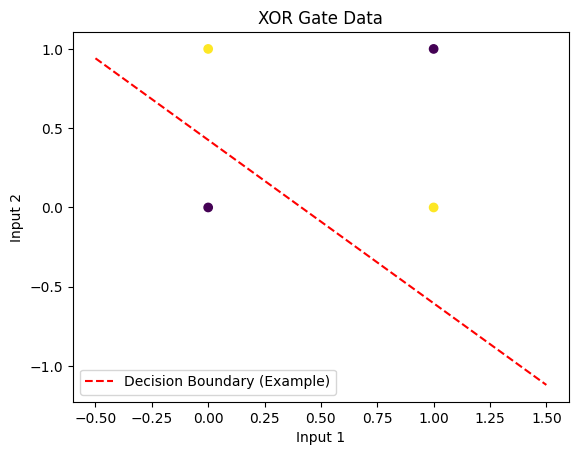

In [34]:
import matplotlib.pyplot as plt
plt.scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, cmap='viridis')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Gate Data')
x_values = np.linspace(-0.5, 1.5, 100)
y_values = -(weights[0] / weights[1]) * x_values - (bias / weights[1])
plt.plot(x_values, y_values, 'r--', label='Decision Boundary (Example)')

plt.legend()
plt.show()


• Observe and discuss the perceptron's performance in this scenario.


The perceptron's performance in this scenario is not successful.
It fails to perfectly learn the XOR function.

XOR is not linearly separable, which means a single perceptron cannot correctly classify all four input combinations.

The perceptron converges to a solution that can correctly classify some inputs but fails on others.

This demonstrates the limitations of a single-layer perceptron and the need for more complex models like multi-layer perceptrons to handle non-linearly separable problems.

• Implement XOR using Multi-Layer Perceptron.

In [28]:
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return x * (1 - x)

In [29]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

input_neurons = 2
hidden_neurons = 4
output_neurons = 1

weights_hidden = np.random.uniform(size=(input_neurons, hidden_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_neurons))
weights_output = np.random.uniform(size=(hidden_neurons, output_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

learning_rate = 0.1

In [30]:
for epoch in range(10000):
  # Forward propagation
  hidden_layer_activation = np.dot(X, weights_hidden) + bias_hidden
  hidden_layer_output = sigmoid(hidden_layer_activation)
  output_layer_activation = np.dot(hidden_layer_output, weights_output) + bias_output
  predicted_output = sigmoid(output_layer_activation)

  # Backpropagation
  error = y - predicted_output
  d_predicted_output = error * sigmoid_derivative(predicted_output)
  error_hidden_layer = d_predicted_output.dot(weights_output.T)
  d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

  # Update weights and biases
  weights_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
  bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
  weights_hidden += X.T.dot(d_hidden_layer) * learning_rate
  bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

In [31]:
# Test the multi-layer perceptron
hidden_layer_activation = np.dot(X, weights_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_activation)
output_layer_activation = np.dot(hidden_layer_output, weights_output) + bias_output
predicted_output = sigmoid(output_layer_activation)

for i in range(len(X)):
  print(f"Input: {X[i]}, Output: {predicted_output[i]}, Expected: {y[i]}")

Input: [0 0], Output: [0.05947401], Expected: [0]
Input: [0 1], Output: [0.94705525], Expected: [1]
Input: [1 0], Output: [0.94710331], Expected: [1]
Input: [1 1], Output: [0.05537502], Expected: [0]


B. Sentiment Analysis Using ANN on IMDb Movie Reviews
(Link Provided at the top of the page to download the dataset Not mandatory to
take all the instances of the dataset, You can trim the dataset)

You are tasked with performing sentiment analysis on the IMDb movie review dataset using
an Artificial Neural Network (ANN). The dataset contains movie reviews labeled as positive
or negative.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('IMDB Dataset - IMDB Dataset.csv')
print(df.head)

<bound method NDFrame.head of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>


Design, implement, and evaluate an ANN model to classify the sentiment of IMDb
movie reviews (positive or negative).

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

In [11]:
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Use One or more hidden layers with ReLU activation and an output layer with
sigmoid activation for binary classification.

In [16]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_vec.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Use the binary cross-entropy loss function for training the model.


In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_vec, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8271 - loss: 0.3793 - val_accuracy: 0.8880 - val_loss: 0.2663
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9150 - loss: 0.2118 - val_accuracy: 0.8848 - val_loss: 0.2749
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9441 - loss: 0.1409 - val_accuracy: 0.8823 - val_loss: 0.3240
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9844 - loss: 0.0466 - val_accuracy: 0.8777 - val_loss: 0.5508
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9983 - loss: 0.0073 - val_accuracy: 0.8780 - val_loss: 0.7909
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9996 - loss: 0.0022 - val_accuracy: 0.8758 - val_loss: 0.9876
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9984 - loss: 0.0055 - val_accuracy: 0.8740 - val_loss: 0.8382
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9975 -

In [15]:
loss, accuracy = model.evaluate(X_test_vec, y_test)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8819 - loss: 0.9987
Test accuracy: 0.8792999982833862


In [18]:
y_pred = model.predict(X_test_vec)
y_pred = (y_pred > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      4961
           1       0.85      0.91      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

[[4169  792]
 [ 453 4586]]



**II. Sentiment Analysis Using ANN**

**1. Load the Dataset and Preprocess**  
Load the IMDb movie reviews dataset.

**2. Encode Sentiment Labels**  
Encode the sentiment labels ('positive', 'negative') as numerical values

**3. Split Data**  
The dataset is split into training and testing sets.

**4. Vectorize Text Reviews**  
Text data (movie reviews) needs to be converted into numerical representations to be used by the neural network.

**5. Create the ANN Model**  
Create a Sequential model from Keras.  
Use Dense layers for the neural network.  
The first hidden layer has 128 neurons with ReLU activation.  
The subsequent hidden layers have 64 and 32 neurons with ReLU activation.  
The output layer has 1 neuron with sigmoid activation to classify whether the sentiment is positive or negative.

**6. Compile the Model**  
The model is compiled with:
- binary_crossentropy: This is an appropriate loss function for binary classification (positive or negative sentiment).


**7. Train the Model**  
The model is trained on the training data.  
Train the model for a 10 number of epochs with a specific batch size.

**8. Evaluate the Model**  
Evaluate the model on the testing set to assess its performance on unseen data.

**Visualization**

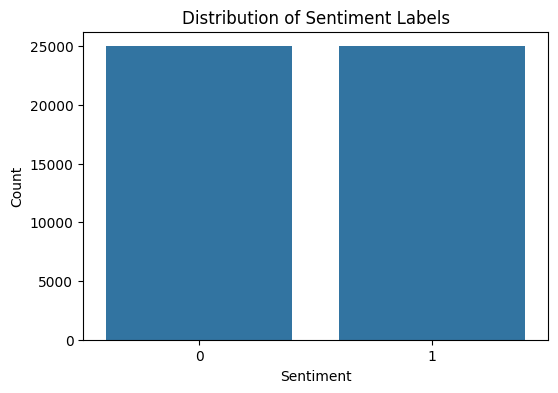

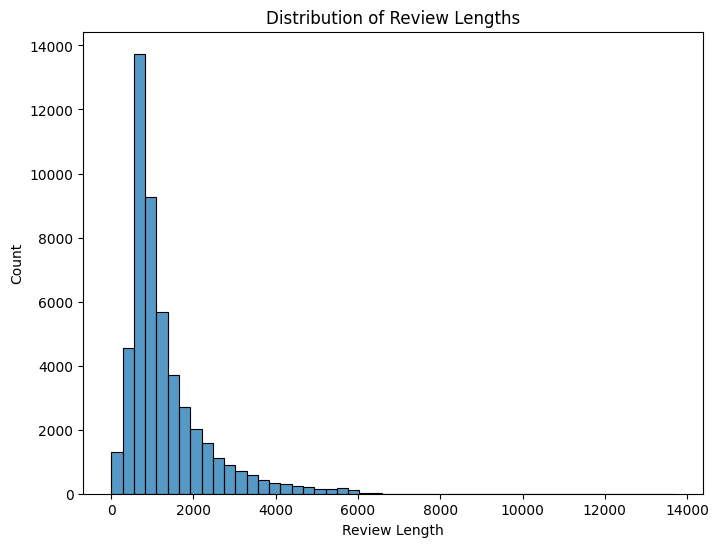

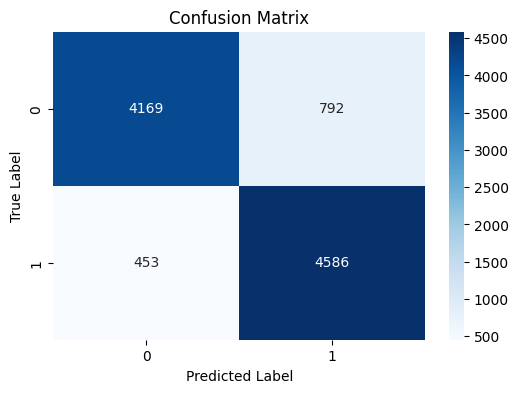

In [32]:


plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

df['review_length'] = df['review'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(df['review_length'], bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()



cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

